## 5.5 特定の月の気候を比較する（兵庫県）
本コードは次の節の内容を含みます。
- 特定の月の気候を比較する（兵庫県）
- 位置情報と気温データを紐づける（兵庫県）
- 気温を地図上で可視化する（兵庫県）

気象データは書籍を参考に取得してください。

In [2]:
import pandas as pd

df_HYOGO_origin = pd.read_csv(
    "兵庫.csv",
    encoding="shift-jis",
    skiprows=[0, 1],
)
df_HYOGO_origin

,Unnamed: 0,香住,香住.1,豊岡,豊岡.1,和田山,和田山.1,生野,生野.1,柏原,...,郡家,郡家.1,兎和野高原,兎和野高原.1,三木,三木.1,南淡,南淡.1,神戸空港,神戸空港.1
0,年月,平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),...,平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃)
1,NaN,NaN,平年値(℃),NaN,平年値(℃),NaN,平年値(℃),NaN,平年値(℃),NaN,...,NaN,平年値(℃),NaN,平年値(℃),NaN,平年値(℃),NaN,平年値(℃),NaN,平年値(℃)
2,2024/1,5.5,4.5,4.6,3.3,4.0,2.6,3.1,1.9,4.3,...,6.4,5.8,1.9,0.7,5.0,3.8,6.5,5.8,7.1,5.9


In [3]:
# 必要な列のみ抽出
df_HYOGO_trim = df_HYOGO_origin.loc[
    :, df_HYOGO_origin.iloc[1] == "平年値(℃)"
]

# inxex=2の行のみ抽出
df_HYOGO_trim = df_HYOGO_trim.iloc[[2]]

# 列名の不要な部分を削除
df_HYOGO_trim.columns = [col.split(".")[0] for col in df_HYOGO_trim.columns]

df_HYOGO_trim

,香住,豊岡,和田山,生野,柏原,一宮,上郡,姫路,家島,明石,神戸,洲本,西脇,福崎,三田,郡家,兎和野高原,三木,南淡,神戸空港
2,4.5,3.3,2.6,1.9,3.2,2.4,3.2,4.4,5.2,5.2,6.2,5.5,3.1,3.6,2.5,5.8,0.7,3.8,5.8,5.9


In [4]:
# 転置
df_HYOGO = df_HYOGO_trim.T

# 列名の修正
df_HYOGO.columns = ["1月の平均気温"]

# データ型の変更
df_HYOGO["1月の平均気温"] = df_HYOGO["1月の平均気温"].astype(float)

df_HYOGO.head()

,1月の平均気温
香住,4.5
豊岡,3.3
和田山,2.6
生野,1.9
柏原,3.2


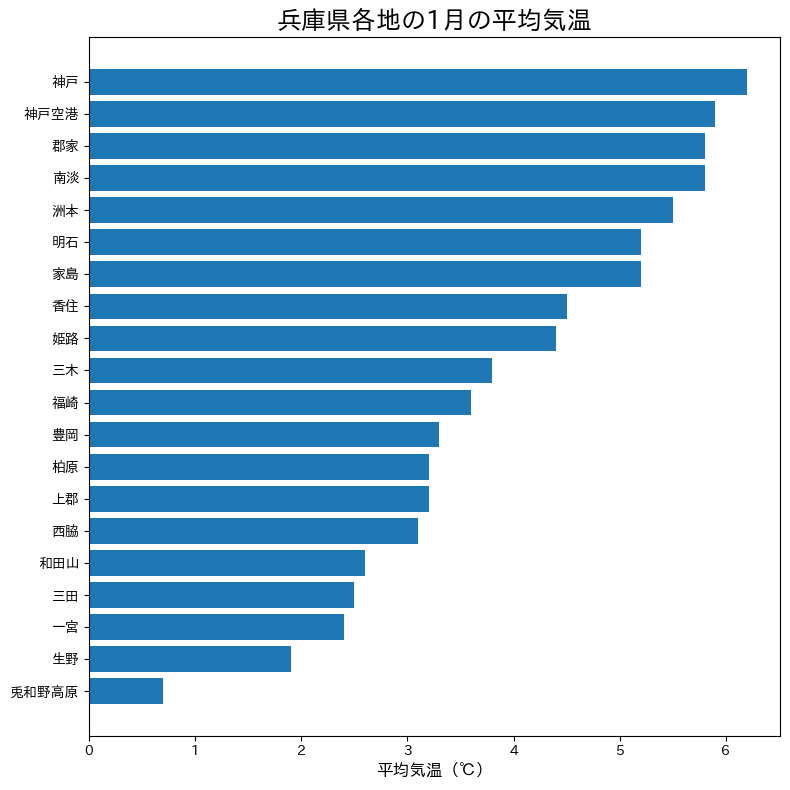

In [5]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# 気温の昇順ソート
df_HYOGO_asc = df_HYOGO.sort_values(by="1月の平均気温", ascending=True)

# 横棒グラフ描画
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(df_HYOGO_asc.index, df_HYOGO_asc["1月の平均気温"])
ax.set_title("兵庫県各地の1月の平均気温", fontsize=18)
ax.set_xlabel("平均気温（℃）", fontsize=12)

# レイアウト調整
plt.tight_layout()
plt.show()

In [6]:
df_amedas_origin = pd.read_csv(
    "amdmaster.csv", encoding="shift-jis", header=[0, 1]
)
df_amedas_origin.head()

Station Number Station Name                   \
  Unnamed: 0_level_1      (Kanji)           (Kana)   
0              11001   宗谷岬　　　　　　　  ｿｳﾔﾐｻｷ            
1              11001   宗谷岬　　　　　　　  ｿｳﾔﾐｻｷ            
2              11001   宗谷岬　　　　　　　  ｿｳﾔﾐｻｷ            
3              11001   宗谷岬　　　　　　　  ｿｳﾔﾐｻｷ            
4              11001   宗谷岬　　　　　　　  ｿｳﾔﾐｻｷ            

                                  Station Name of Snow                   \
               Unnamed: 3_level_1              (Kanji)           (Kana)   
0  SOYAMISAKI                               　　　　　　　　　　                    
1  SOYAMISAKI                               　　　　　　　　　　                    
2  SOYAMISAKI                               　　　　　　　　　　                    
3  SOYAMISAKI                               　　　　　　　　　　                    
4  SOYAMISAKI                               　　　　　　　　　　                    

                                  Latitude_Precipitation  \
               Unnamed: 6_level_1               (degree)   
0                                                 45.520   
1                                                 45.520   
2                                                 45.520   
3                                                 45.520   
4                                                 45.520   

  Longitude_Precipitation Altitude_Precipitation  ...          Start Date  \
                 (degree)                    (m)  ... Unnamed: 23_level_1   
0                 141.935                   0026  ...          1978-10-30   
1                 141.935                   0026  ...          1987-05-14   
2                 141.935                   0026  ...          2006-10-06   
3                 141.935                   0026  ...          2008-09-09   
4                 141.935                   0026  ...          2009-10-28   

             End Date  Old Station Number Disconnection of Precipitation  \
  Unnamed: 24_level_1 Unnamed: 25_level_1            Unnamed: 26_level_1   
0          1987-05-13               11001                              1   
1          2006-10-05               11001                              0   
2          2008-09-08               11001                              0   
3          2009-10-27               11001                              0   
4          2021-03-01               11001                              0   

  Disconnection of Wind Speed Disconnection of Temperature  \
          Unnamed: 27_level_1          Unnamed: 28_level_1   
0                           1                            1   
1                           0                            0   
2                           0                            0   
3                           4                            4   
4                           0                            0   

  Disconnection of Sunshine Duration Disconnection of Depth of Snow Cover  \
                 Unnamed: 29_level_1                  Unnamed: 30_level_1   
0                                  1                                    1   
1                                  1                                    0   
2                                  4                                    0   
3                                  0                                    0   
4                                  0                                    0   

  Unnamed: 31_level_0 Disconnection of Humidity  
  Unnamed: 31_level_1       Unnamed: 32_level_1  
0                                             1  
1                                             0  
2                                             0  
3                                             0  
4                                             0  

[5 rows x 33 columns]

In [7]:
# 現在も観測中のアメダスのみ抽出
df_amedas = df_amedas_origin.loc[
    df_amedas_origin[("End Date", "Unnamed: 24_level_1")] == "9999-99-99",
]

# 必要な列のみ抽出
df_amedas = df_amedas.filter(
    items=[
        ("Station Name", "(Kanji)"),
        ("Latitude_Precipitation", "(degree)"),
        ("Longitude_Precipitation", "(degree)"),
    ]
)
df_amedas.columns = ["観測所", "緯度", "経度"]

df_amedas.head()

,観測所,緯度,経度
6,宗谷岬,45.520,141.935
19,稚内,45.415,141.678
25,礼文,45.305,141.045
30,声問,45.403,141.802
38,浜鬼志別,45.335,142.170


In [8]:
df_amedas["観測所"] = df_amedas["観測所"].apply(lambda x: x.strip())
df_amedas["緯度"] = df_amedas["緯度"].astype(float)
df_amedas["経度"] = df_amedas["経度"].astype(float)

df_amedas

,観測所,緯度,経度
6,宗谷岬,45.520,141.935
19,稚内,45.415,141.678
25,礼文,45.305,141.045
30,声問,45.403,141.802
38,浜鬼志別,45.335,142.170
...,...,...,...
7740,西表島,24.427,123.765
7746,石垣島,24.337,124.163
7749,盛山,24.395,124.245
7757,大原,24.265,123.872


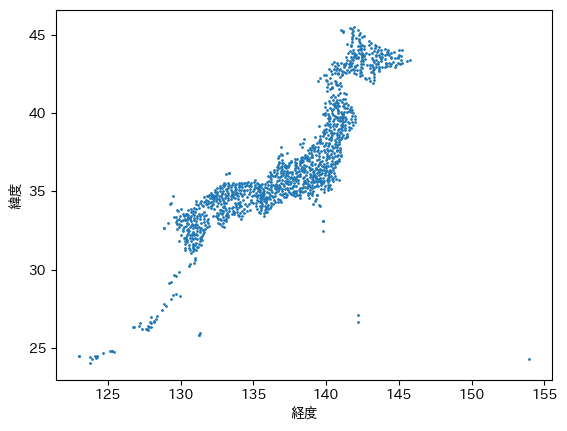

In [10]:
df_amedas.plot.scatter(x="経度", y="緯度", s=1)
plt.show()

In [11]:
df_merge = pd.merge(
    df_HYOGO, df_amedas, left_index=True, right_on="観測所", how="left"
)
df_merge.head()

,1月の平均気温,観測所,緯度,経度
5180,4.5,香住,35.625,134.627
5192,3.3,豊岡,35.535,134.822
5213,2.6,和田山,35.323,134.848
5219,1.9,生野,35.167,134.792
5228,3.2,柏原,35.137,135.065


In [12]:
df_merge = df_merge[df_merge["緯度"] != 35.298]
df_merge

,1月の平均気温,観測所,緯度,経度
5180,4.5,香住,35.625,134.627
5192,3.3,豊岡,35.535,134.822
5213,2.6,和田山,35.323,134.848
5219,1.9,生野,35.167,134.792
5228,3.2,柏原,35.137,135.065
5237,2.4,一宮,35.097,134.585
5265,3.2,上郡,34.858,134.373
5274,4.4,姫路,34.838,134.670
5300,5.2,家島,34.672,134.527
5305,5.2,明石,34.687,134.877


In [13]:
import folium

map = folium.Map(
    location=[35, 135],
    zoom_start=9,
    tiles="Stadia.StamenTerrainBackground",
)
map

In [14]:
import folium

map = folium.Map(
    location=[35, 135],
    zoom_start=9,
    tiles="Stadia.StamenTerrainBackground",
)

for _, row in df_merge.iterrows():
    icon = f"""
    <div style="width:70px;font-size:14px;color:black;font-weight:bold;">
        {row['観測所']}
    </div>
    """
    folium.Marker(
        [row["緯度"], row["経度"]], icon=folium.DivIcon(html=icon)
    ).add_to(map)

map

In [15]:
# 連鎖コピー防止
pd.options.mode.copy_on_write = True

temp_bins = [0.5, 2.5, 5.5, 7.5]
temp_color = ["blue", "lightblue", "white"]

# 色を割り当てる
df_merge["color"] = pd.cut(
    df_merge["1月の平均気温"], bins=temp_bins, labels=temp_color
)

df_merge.head()

,1月の平均気温,観測所,緯度,経度,color
5180,4.5,香住,35.625,134.627,lightblue
5192,3.3,豊岡,35.535,134.822,lightblue
5213,2.6,和田山,35.323,134.848,lightblue
5219,1.9,生野,35.167,134.792,blue
5228,3.2,柏原,35.137,135.065,lightblue


In [17]:
# 地図の作成
map = folium.Map(
    location=[35, 135],
    zoom_start=9,
    tiles="Stadia.StamenTerrainBackground",
)

# マーカーを追加
for _, row in df_merge.iterrows():
    icon_html = f"""
        <div style="width:70px;font-size:14px;color:black;font-weight:bold;">
            <i class="fa fa-square" style="color:{row['color']};"></i>
            {row['観測所']}
        </div>
    """
    folium.Marker(
        [row["緯度"], row["経度"]],
        tooltip=f"{row['1月の平均気温']} ℃",
        icon=folium.DivIcon(html=icon_html),
    ).add_to(map)

map